# Uso básico de NetworkX

## Introducción

Las discusiones anteriores son importantes pues fundamentan qué operaciones podremos o no podremos hacer con nuestra estructura de gráficas y en qué tiempo y espacio computacional. En la práctica, muchas de estas decisiones ya están tomadas en librerías flexibles y de uso general.

En esta entrada hablaremos de NetworkX, una librería de teoría de gráficas para Python que usaremos en los siguientes capítulos. Esto nos permitirá trabajar con gráficas sin tener que definir nuestras propias estructuras. Aunque usaremos las estructuras y funciones básicas que nos da NetworkX, intentaremos que sea lo menos posible. La mayoría de los algoritmos que discutiremos los implementaremos "desde cero" aunque ya estén en la librería. Esto nos permitirá ver el código y su funcionamiento de manera tangible.

## Comandos básicos

NetworkX no es una libería por default de Python, así que para usarla deberás instalarla. Una vez que hayas hecho esto, se recomienda importarla como `nx` para ahorrar escritura.

Una forma rápida de iniciar una gráfica es creando un objeto `Graph` y usando el método `add_edges_from`. Esto automáticamente genera la lista de vértices. Dado que se está usando un objeto `Graph`, la librería sabe que las aristas no son dirigidas y que hay que considerarlas en ambos lados. Por esta razón, no es necesario agregar las aristas "de regreso".

Se pueden consultar los vértices y las aristas de una gráfica mediante los atributos `nodes` y `edges` respectivamente. Estos son tipos de objeto especiales que en la duda conviene convertir a lista. 

También se pueden consultar los vecinos de un vértice mediante el método `neighbors` de la gráfica. Esto regresa un iterador, así que hay que usar `list` para pasarlo a una lista.

In [8]:
import networkx as nx

G=nx.Graph()
G.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,4)])

print("Los vértices de G son {}".format(list(G.nodes)))
print("Las aristas de G son {}".format(list(G.edges)))

print("Los vecinos de 1 en G son {}".format(list(G.neighbors(1))))
print("Los vecinos de 4 en G son {}".format(list(G.neighbors(4))))

Los vértices de G son [1, 2, 3, 4]
Las aristas de G son [(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)]
Los vecinos de 1 en G son [2, 4]
Los vecinos de 4 en G son [3, 1, 2]


En NetworkX también se pueden agregar pesos a las aristas, lo cual se puede hacer fácilmente mediante el método `add_weighted_edges_from`. Las primeras dos entradas de cada terna que se da corresponden a los vértices y la tercera al peso. Para consultar el peso de una arista, podemos leer a la gráfica como si fuera primero una matriz y luego un diccionario con la llave `weight`.

Si queremos hacer la consulta de las aristas con todo y su información, hay que usar `edges` como método y establecer el parámetro `data` como `True`.

In [37]:
W=nx.Graph()
W.add_weighted_edges_from([(1,2,1.1),(2,3,1.2),(3,4,1.4),(4,1,0),(2,4,1.6)])

print("Los vértices de W son {}".format(list(W.nodes)))
print("Las aristas de W son {}".format(list(W.edges)))
print("El peso de la arista (4,3) es {}".format(W[4][3]['weight']))
print("Las aristas de W y sus pesos son {}".format(list(W.edges(data=True))))

Los vértices de W son [1, 2, 3, 4]
Las aristas de W son [(1, 2), (1, 4), (2, 3), (2, 4), (3, 4)]
El peso de la arista (4,3) es 1.4
Las aristas de W y sus pesos son [(1, 2, {'weight': 1.1}), (1, 4, {'weight': 0}), (2, 3, {'weight': 1.2}), (2, 4, {'weight': 1.6}), (3, 4, {'weight': 1.4})]


Como puedes ver en la última lista, para guardar el peso NetworkX usa un diccionario. Este es el diccionario de datos de la arista, y en él se puede guardar información mucho más general que simplemente el peso. Del mismo modo, los vértices también tienen su diccionario de datos.

Para utilizar gráficas dirigidas se debe utilizar un tipo de objeto diferente: `DiGraph`. El uso de este objeto indica a NetworkX que el orden en cada arista es importante, y es así como las convierte en flechas. Cuando se usa `neighbors` ahora sólo se obtienen los vértices hacia los cuales hay flecha desde el vértice dado. Si se quieren saber los vérices para los cuales hay flecha hacia el vértice dado hay que usar `predecessors`. Compara el siguiente código con el primero que vimos.

In [21]:
D=nx.DiGraph()
D.add_edges_from([(1,2),(2,3),(3,4),(4,1),(2,4)])

print("En D hay flecha de 1 a los vértices {}".format(list(D.neighbors(1))))
print("En D hay flecha de 4 a los vértices {}".format(list(D.neighbors(4))))

print("En D hay flecha hacia 1 desde los vértices {}".format(list(D.predecessors(1))))
print("En D hay flecha hacia 4 desde los vértices {}".format(list(D.predecessors(4))))

En D hay flecha de 1 a los vértices [2]
En D hay flecha de 4 a los vértices [1]
En D hay flecha hacia 1 desde los vértices [4]
En D hay flecha hacia 4 desde los vértices [3, 2]


## Dibujos de gráficas

Otra ventaja de NetworkX es que tiene utilidades para dibujar gráficas. En el caso más sencillo, basta utilizar la función `draw` de la librería y dar como argumento la gráfica.

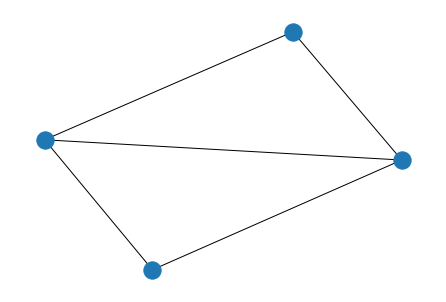

In [57]:
nx.draw(G)


Opcionalmente, se pueden etiquetar los nodos por su nombre, colorearlos, cambiar el estilo de las aristas, etc. También se puede dar un objeto `ax` de Matplotlib sobre el cual dibujar. Esto permite utilizar toda la flexibilidad de Matplotlib para determinar tamaños, títulos, leyendas, posiciones, etc.

Otro de los argumentos que puede ser importante para una correcta visualización es el uso de *layouts* ("disposiciones"), que son formas de acomodar a los vértices. Se puede pedir que queden en un círculo, alineados, en filas, etc.

Para etiquetar las aristas es necesario pedir a la librería que dibuje de manera explícita los pesos usando `draw_networkx_edge_labels`. Para ello hay que usar la misma disposición tanto en `draw` como en esta función.

Hagamos algunos dibujos básicos de $G$, $W$ y $D$ que creamos en la sección anterior.

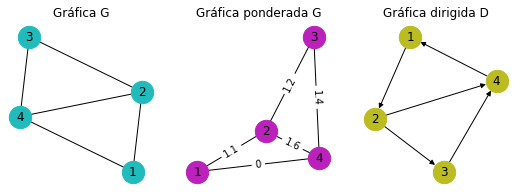

In [40]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1,3)

fig.set_size_inches(9,3)

nx.draw(G,ax=axes[0],with_labels=True, node_color='#22bbbb',node_size=500)
axes[0].set_title("Gráfica G")

layout=nx.spring_layout(W)
labels2 = nx.get_edge_attributes(W,'weight')
nx.draw(W,layout,ax=axes[1],with_labels=True, node_color='#bb22bb',node_size=500)
nx.draw_networkx_edge_labels(W,layout,ax=axes[1],edge_labels=labels2)
axes[1].set_title("Gráfica ponderada G")

nx.draw(D,ax=axes[2],with_labels=True, node_color='#bbbb22',node_size=500)
axes[2].set_title("Gráfica dirigida D")

plt.show()

## Algunos otros ejemplos

Las gráficas que vimos arriba las dimos explícitamente. Sin embargo, en las aplicaciones usualmente no queremos tener que dar las aristas una por una. Usualmente las gráficas con las que trabajamos o bien tienen una estructura que permite definirlas fácilmente, o bien vienen de datos de la vida real. Veamos un par de ejemplos.

*Ejemplo.* Mediante el siguiente código podemos construir la "gráfica cuadrícula dirigida" de $n \times n$. Observa cómo estrategicamente estamos usando la etiqueta de cada vértice como su posición.

In [103]:
def g_cuadricula(n):
    G=nx.DiGraph()
    for i in range(n):
        for j in range(n-1):
            G.add_edge((i,j),(i,j+1))
            G.add_edge((j,i),(j+1,i))
    return(G)

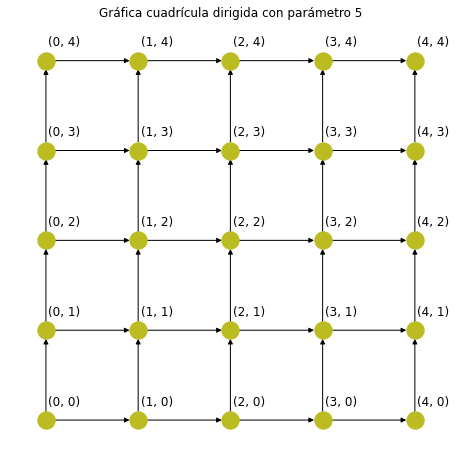

In [105]:
fig, ax = plt.subplots()

fig.set_size_inches(8,8)
cuad5=g_cuadricula(5)
nx.draw(cuad5,ax=ax,node_color='#bbbb22',pos={x:x for x in cuad5.nodes})
nx.draw_networkx_labels(cuad5,ax=ax,pos={x:(x[0]+0.2,x[1]+0.2) for x in cuad5.nodes})
ax.set_title("Gráfica cuadrícula dirigida con parámetro 5")
plt.show()

<span class="math" style="float:right">$\square$</span>

Veamos otro ejemplo.

*Ejemplo.* A continuación se lee la base de datos de Becarios Conacyt Extranjeros de 2018. Una de sus columnas es de país y la otra es de área del conocimiento. ¿A qué países van los becarios a trabajar en cada área? Esto lo podemos registrar mediante una gráfica bipartita, poniendo los países a la izquierda y las áreas del conocimiento a la izquierda. Colocamos una arista de peso $w$ entre un país y un área del conocimiento si hay $w$ becarios que se fueron a ese país a estudiar en esa área.

In [158]:
import pandas as pd

df=pd.read_csv("Becas_Extranjero_Ene_Dic_2018.csv")

paises=sorted(df['PAÍS'].unique(),reverse=True)
areas=sorted(df['ÁREA DEL CONOCIMIENTO'].unique(),reverse=True)

B=nx.Graph()
B.add_weighted_edges_from(list(df.groupby(['ÁREA DEL CONOCIMIENTO', 'PAÍS']).count()['CONSEC.'].reset_index().to_records(index=False)))

Podríamos hacer el dibujo de la gráfica, como se muestra a continuación. Sin embargo, hay demasiada información ocurriendo en la figura y no es claro a qué se refiere. De cualquier forma, en la variable `B` ya contamos con una gráfica que más adelante podríamos usar en alguno de nuestros algoritmos.

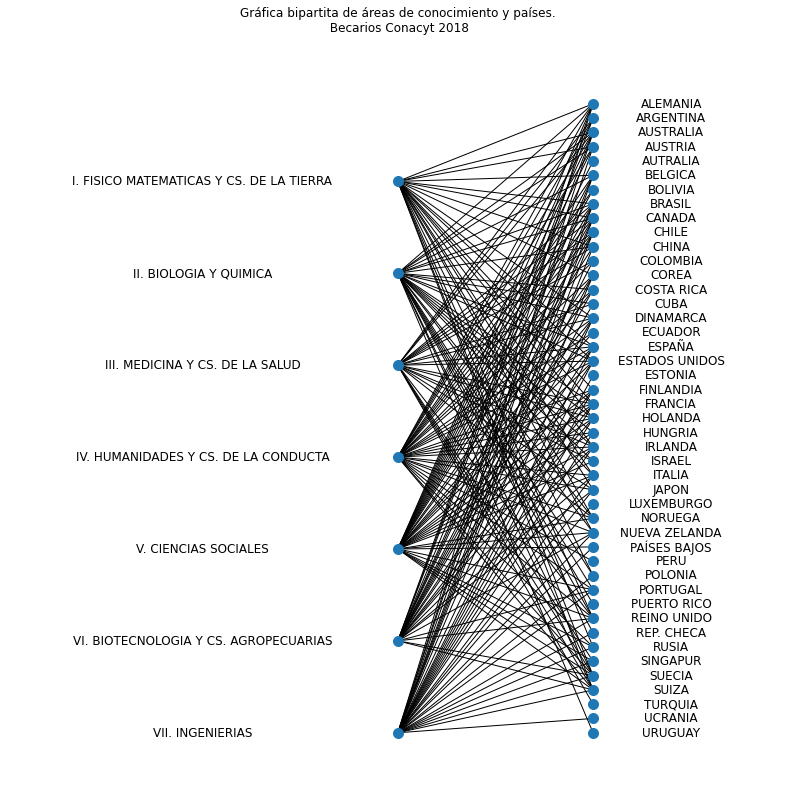

In [159]:
layout={}
labels={}
for i, j in enumerate(areas):
    layout[j]=(0.5,i/len(areas))
    labels[j]=(0,i/len(areas))
for i, j in enumerate(paises):
    layout[j]=(1,i/len(paises))
    labels[j]=(1.2,i/len(paises))

fig, ax= plt.subplots()
ax.set_xlim(-0.5,1.5)
ax.set_title("Gráfica bipartita de áreas de conocimiento y países.\n Becarios Conacyt 2018")
fig.set_size_inches(14,14)

nx.draw(B,layout,node_size=100)
nx.draw_networkx_labels(B,labels)

plt.show()

<span class="math" style="float:right">$\square$</span>

## Tarea moral

Los siguientes problemas te ayudarán a practicar lo visto en esta entrada. Para resolverlos, necesitarás usar herramientas matemáticas, computacionales o ambas.

1. Considera las gráficas $D$ y $W$ de la tarea moral del capítulo "Implementaciones de gráficas y variantes". Crea estas gráficas en NetworkX y grafícalas.
2. Lee acerca de la gráfica de Petersen (por ejemplo <a href="https://en.wikipedia.org/wiki/Petersen_graph"> en Wikipedia</a>). Define la gráfica de Petersen en NetworkX de manera manual, dando arista por arista. Luego, defínela de manera un poco más computacional, notando que puedes nombrar a los vértices $(a,b)$ en donde $a=0$ ó $1$, y $b=0,1,2,3,4$. Con esta forma de llamar los vértices es más fácil hacer la gráfica con un ciclo.
3. Dibuja la gráfica de Petersen utilizando un layout de Kamada-Kawai. Cambia el color a los vértices, utiliza aristas punteadas, haz los vértices más chicos y escribe sobre cada arista los dos nodos que la unen.
4. Realiza una gráfica dirigida cuyos vértices sean las estaciones de metro de la ciudad de metro y en donde hay una flecha de la estación $E$ a la estación $F$ si son consecutivas en una misma línea de metro, y el nombre de $E$ es alfabéticamente menor al de $F$. Muestra la gráfica.
5. Revisa la documentación de NetworkX para conocer qué más se puede hacer. Está disponible en la siguiente dirección: <a href="https://networkx.org/documentation/stable/reference/index.html"> NetworkX Reference </a>.   